In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./data/house_train.csv')
test = pd.read_csv('./data/house_test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train = train.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'MSSubClass'], axis = 1)
train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [7]:
train[train['LotFrontage'].isna()]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,99,0,0,0,0,4,2007,WD,Normal,182900
1431,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,...,0,0,0,0,0,10,2009,WD,Normal,143750
1441,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,5,2008,WD,Normal,149300
1443,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,40,0,0,5,2009,WD,Normal,121000


<Axes: ylabel='LotFrontage'>

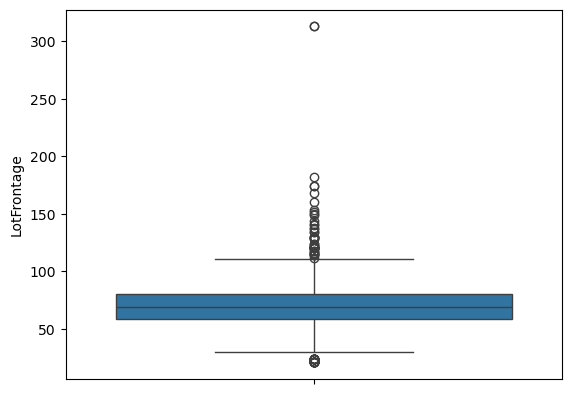

In [8]:
sns.boxplot(train['LotFrontage'])

In [9]:
train[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


In [10]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [12]:
train[train['MasVnrArea'].isna()]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,RL,70.049958,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,RL,70.049958,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,FV,65.000000,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,RL,67.000000,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,FV,95.000000,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,...,0,0,0,0,0,12,2008,New,Partial,182000
977,FV,35.000000,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,RL,75.000000,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,3,2008,WD,Normal,237000


In [13]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [14]:
train['MasVnrArea'].mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [15]:
train[train['MasVnrArea'] >= 103]['1stFlrSF'].mean()

1326.4285714285713

In [16]:
train[train['MasVnrArea'].isna()]['1stFlrSF'].mean()

1408.75

In [17]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [19]:
train[train['BsmtQual'].isna()]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,RL,72.000000,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,RL,65.000000,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,RL,60.000000,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,RL,64.000000,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,RL,60.000000,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,RL,60.000000,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,RM,70.000000,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,RL,70.049958,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,RL,64.000000,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,RL,80.000000,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [20]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [21]:
train['BsmtQual'] = train['BsmtQual'].fillna('no_exist')
train['BsmtCond'] = train['BsmtCond'].fillna('no_exist')
train['BsmtExposure'] = train['BsmtExposure'].fillna('no_exist')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('no_exist')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('no_exist')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [23]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [24]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [25]:
train['GarageType'] = train['GarageType'].fillna('no_exist')
train['GarageFinish'] = train['GarageFinish'].fillna('no_exist')
train['GarageQual'] = train['GarageQual'].fillna('no_exist')
train['GarageCond'] = train['GarageCond'].fillna('no_exist')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [26]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [30]:
train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [31]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [33]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']
X = pd.get_dummies(X, drop_first = True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =7)

In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
rfc = RandomForestRegressor(n_estimators = 1000, n_jobs = 10, random_state = 7)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### 랜덤포레스트 일단 한 번 돌려보기

In [45]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
X = pd.get_dummies(X, drop_first = True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =7)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfc = RandomForestRegressor(n_estimators = 1000, n_jobs = 10, random_state = 7)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

ValueError: could not convert string to float: 'RL'